In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import functions as f
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the walmart dataset 
walmart_df = pd.read_csv(r"../data/raw/WMT_Grocery_202209.csv",low_memory=False)
walmart_df

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568529,568529,70072,Alcohol,Wine,White Wine,Alcohol/Wine,593600139,https://www.walmart.com/ip/Farm-Fresh-Blueberr...,Farm Fresh Blueberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732333
568530,568530,70072,Alcohol,Wine,White Wine,Alcohol/Wine,333403243,https://www.walmart.com/ip/Farm-Fresh-Peach-Mo...,Farm Fresh Peach Moscato 750 Ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732334
568531,568531,70072,Alcohol,Wine,White Wine,Alcohol/Wine,526588325,https://www.walmart.com/ip/Farm-Fresh-Raspberr...,Farm Fresh Raspberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732335
568532,568532,70072,Alcohol,Wine,White Wine,Alcohol/Wine,286992782,https://www.walmart.com/ip/Farm-Fresh-Mango-Mo...,Farm Fresh Mango Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732336


In [3]:
f.print_in_red("Informations about DataFrame")
walmart_df.info()

Informations about DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              568534 non-null  int64  
 1   SHIPPING_LOCATION  568534 non-null  int64  
 2   DEPARTMENT         568534 non-null  object 
 3   CATEGORY           568534 non-null  object 
 4   SUBCATEGORY        361324 non-null  object 
 5   BREADCRUMBS        568534 non-null  object 
 6   SKU                568534 non-null  int64  
 7   PRODUCT_URL        568534 non-null  object 
 8   PRODUCT_NAME       568534 non-null  object 
 9   BRAND              568507 non-null  object 
 10  PRICE_RETAIL       568534 non-null  float64
 11  PRICE_CURRENT      568534 non-null  float64
 12  PRODUCT_SIZE       505709 non-null  object 
 13  PROMOTION          0 non-null       float64
 14  RunDate            568534 non-null  object 
 15  tid                568

In [4]:
f.print_in_red("Shape of DataFrame")
print(f"rows: {walmart_df.shape[0]}\ncolumns: {walmart_df.shape[1]}")

Shape of DataFrame
rows: 568534
columns: 16


In [5]:
# Cleaning the columns name
f.clean_column_names(walmart_df)

In [6]:
# dropping unwanted columns
f.drop_columns(walmart_df,["index","tid","promotion"])

In [7]:
# checking null values
walmart_df.isnull().sum()

shipping_location         0
department                0
category                  0
subcategory          207210
breadcrumbs               0
sku                       0
product_url               0
product_name              0
brand                    27
price_retail              0
price_current             0
product_size          62825
rundate                   0
dtype: int64

In [8]:
walmart_df.columns

Index(['shipping_location', 'department', 'category', 'subcategory',
       'breadcrumbs', 'sku', 'product_url', 'product_name', 'brand',
       'price_retail', 'price_current', 'product_size', 'rundate'],
      dtype='object')

In [9]:
# Filling null values
walmart_df["subcategory"] = f.fillna_col(walmart_df,"subcategory","Not_Available")
walmart_df["brand"] = f.fillna_col(walmart_df, "brand", "Unknown")

In [10]:
# Convert 'product_size' to numeric, coercing errors to NaN
walmart_df['product_size'] = pd.to_numeric(walmart_df['product_size'], errors='coerce')
# Convert NaN to 0 (or handle them as needed)
walmart_df['product_size'] = walmart_df['product_size'].fillna(0)
# Convert to integers datatype
walmart_df['product_size'] = walmart_df['product_size'].astype(int)

In [11]:
# Converting to datetime datatype
walmart_df["rundate"] = pd.to_datetime(walmart_df["rundate"],format="%Y-%m-%d  %H:%M:%S", errors='coerce')
walmart_df["rundate"] = walmart_df["rundate"].dt.strftime("%d/%m/%Y %H:%M:%S")

**Grouping**

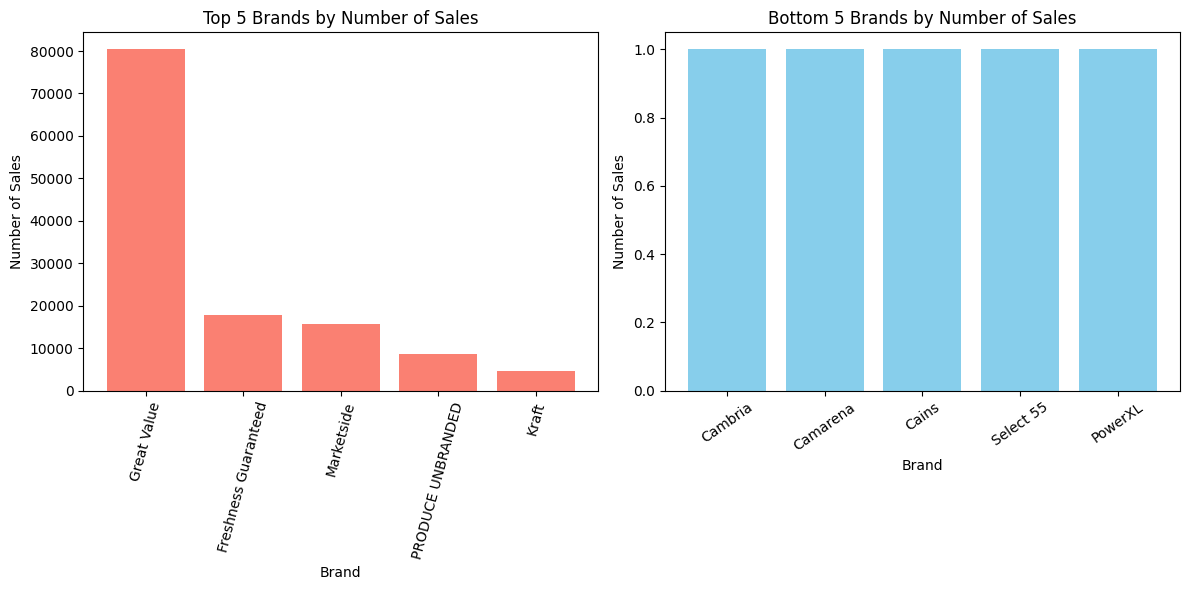

In [12]:
# Group by brand and count the number of sales, then sort in descending order

sales_by_brand = walmart_df.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)

# Bar plot for visualization
plt.figure(figsize=(12, 6))

# Plotting top 5 brands
plt.subplot(1, 2, 1)
plt.bar(sales_by_brand.index[:5], sales_by_brand['count'][:5], color='salmon')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Top 5 Brands by Number of Sales')
plt.xticks(rotation=75)

# Plotting bottom 5 brands
plt.subplot(1, 2, 2)
plt.bar(sales_by_brand.index[-5:], sales_by_brand['count'][-5:], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Bottom 5 Brands by Number of Sales')
plt.xticks(rotation=35)

plt.tight_layout()
plt.show()


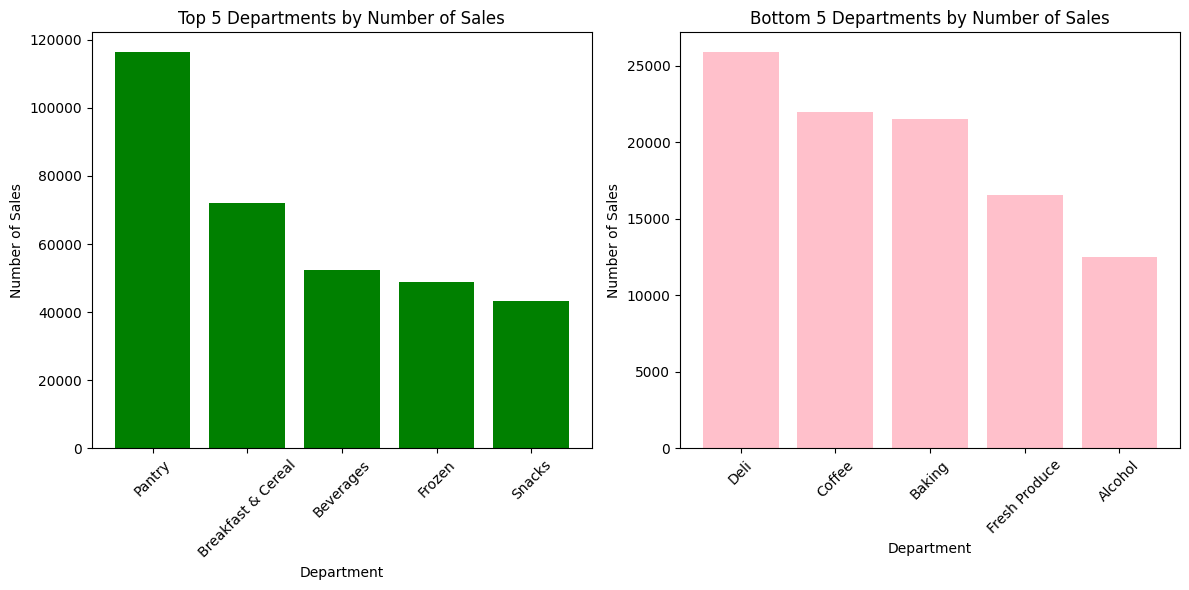

In [13]:
# Group by department and count the number of sales, then sort in descending order
sales_by_department = (walmart_df.groupby("department").size().sort_values(ascending=False))

# Bar plot for visualization
plt.figure(figsize=(12, 6))

# Plotting top departments
plt.subplot(1, 2, 1)
plt.bar(sales_by_department.index[:5], sales_by_department.values[:5], color='green')
plt.xlabel('Department')
plt.ylabel('Number of Sales')
plt.title('Top 5 Departments by Number of Sales')
plt.xticks(rotation=45)

# Plotting bottom departments
plt.subplot(1, 2, 2)
plt.bar(sales_by_department.index[-5:], sales_by_department.values[-5:], color='pink')
plt.xlabel('Department')
plt.ylabel('Number of Sales')
plt.title('Bottom 5 Departments by Number of Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

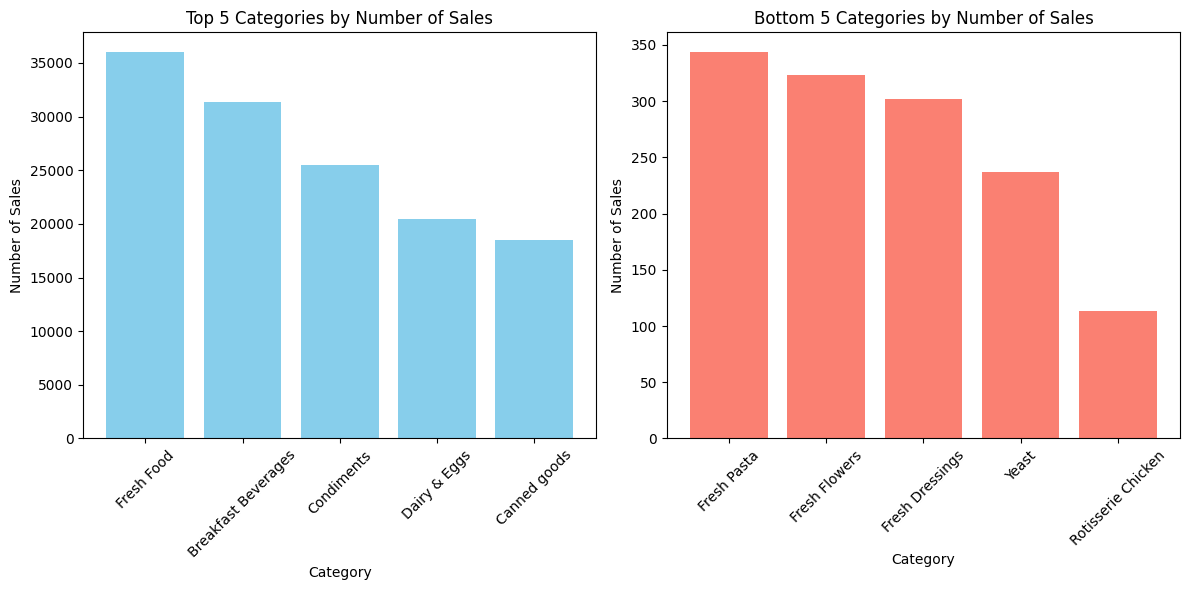

In [14]:
# Group by category and count the number of sales, then sort in descending order
sales_by_category = walmart_df.groupby('category').size().sort_values(ascending=False)

# Bar plot for visualization
plt.figure(figsize=(12, 6))

# Plotting top categories
plt.subplot(1, 2, 1)
plt.bar(sales_by_category.index[:5], sales_by_category.values[:5], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.title('Top 5 Categories by Number of Sales')
plt.xticks(rotation=45)

# Plotting bottom categories
plt.subplot(1, 2, 2)
plt.bar(sales_by_category.index[-5:], sales_by_category.values[-5:], color='salmon')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.title('Bottom 5 Categories by Number of Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

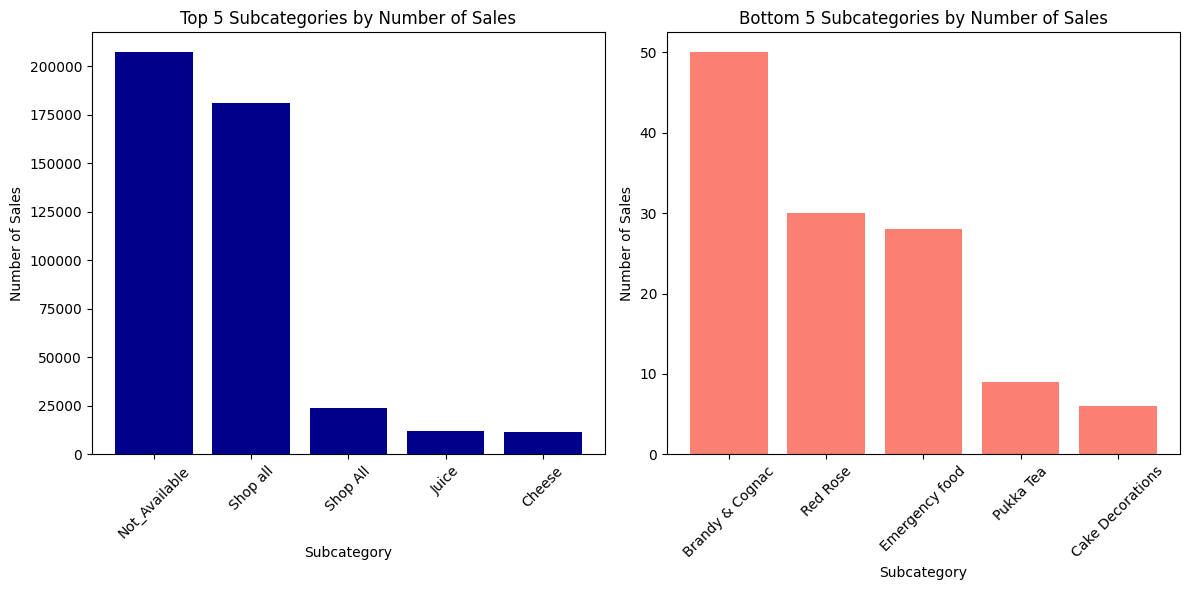

In [15]:
# Group by subcategory and count the number of sales, then sort in descending order
sales_by_subcategory = walmart_df.groupby('subcategory').size().sort_values(ascending=False)

# Bar plot for visualization
plt.figure(figsize=(12, 6))

# Plotting top subcategories
plt.subplot(1, 2, 1)
plt.bar(sales_by_subcategory.index[:5], sales_by_subcategory.values[:5], color='darkblue')
plt.xlabel('Subcategory')
plt.ylabel('Number of Sales')
plt.title('Top 5 Subcategories by Number of Sales')
plt.xticks(rotation=45)

# Plotting bottom subcategories
plt.subplot(1, 2, 2)
plt.bar(sales_by_subcategory.index[-5:], sales_by_subcategory.values[-5:], color='salmon')
plt.xlabel('Subcategory')
plt.ylabel('Number of Sales')
plt.title('Bottom 5 Subcategories by Number of Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

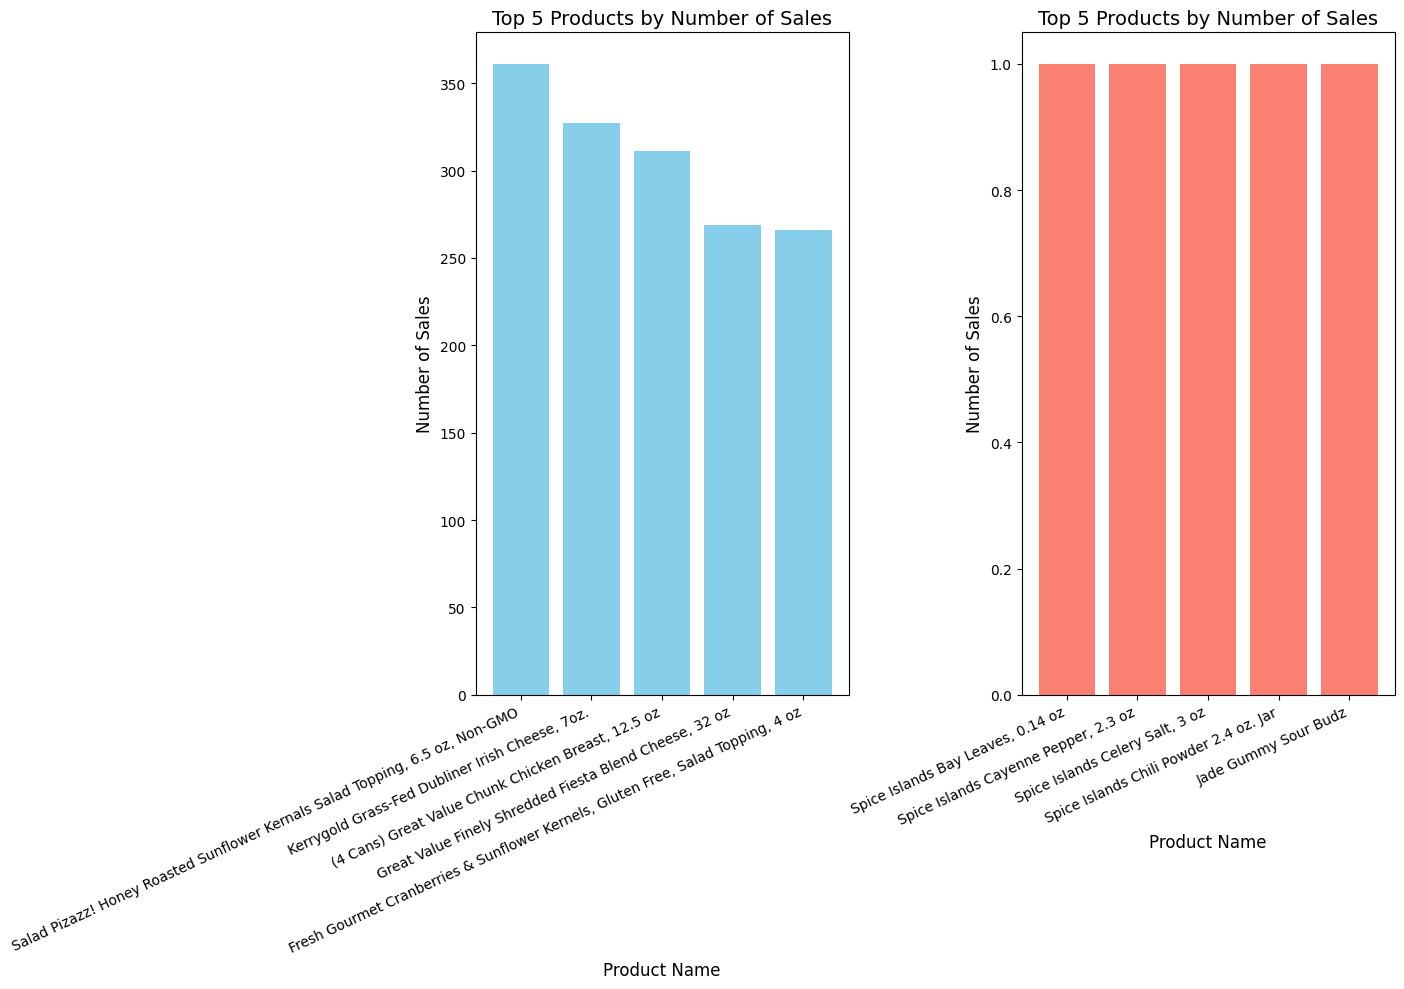

In [16]:
# Group by product_name and count the number of sales, then sort in descending order
sales_by_product = walmart_df.groupby('product_name').size().sort_values(ascending=False)

# Bar plot for visualization
plt.figure(figsize=(14, 10))

# Plotting top products
plt.subplot(1, 2, 1)
plt.bar(sales_by_product.index[:5], sales_by_product.values[:5], color='skyblue')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Top 5 Products by Number of Sales', fontsize=14)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.yticks

# Plotting bottom products
plt.subplot(1, 2, 2)
plt.bar(sales_by_product.index[-5:], sales_by_product.values[-5:], color='salmon')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Top 5 Products by Number of Sales', fontsize=14)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.yticks

plt.tight_layout()
plt.show()

In [ ]:
# Count the number of products per brand in each department
brand_department_count = walmart_df.groupby(['department', 'brand']).size().reset_index(name='counts')
display(brand_department_count)
plt.figure(figsize=(12, 6))
plt.bar(x='department', y='counts', hue='brand', data=brand_department_count)
plt.title('Brand Popularity by Department')
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.legend(title='Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,department,brand,counts
0,Alcohol,1000 Stories,2
1,Alcohol,14 Hands,30
2,Alcohol,1800,12
3,Alcohol,19 CRIMES,73
4,Alcohol,21 Seeds,4
...,...,...,...
7260,Snacks,barkTHINS,20
7261,Snacks,belVita,86
7262,Snacks,flipz,76
7263,Snacks,popchips,9


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15184\1429866078.py:11: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15184\1429866078.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15184\1429866078.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Lenovo\Desktop\week3_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\Desktop\week3_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
walmart_df.groupby(["department"])[["subcategory"]].nunique()

In [ ]:
f.print_in_red("Total number of sales by Brand and Department")
walmart_df.groupby(["brand","department"])["sku"].count().sort_values(ascending=False)

In [ ]:
# Grouping and applying multiple aggregations
aggregated_data = walmart_df.groupby(
    ['brand', 'department', 'category', 'subcategory', 'product_name', 'shipping_location']
).agg({
    'price_current': ['sum', 'mean'],
    'sku': 'count'  # Using SKU count as a proxy for product count
}).reset_index()

# Renaming columns for better readability
aggregated_data.columns = [
    'brand', 'department', 'category', 'subcategory', 'product_name', 'shipping_location',
    'total_sales', 'average_current_price', 'product_count'
]

# Sorting the DataFrame by total sales in descending order
aggregated_data = aggregated_data.sort_values(by='total_sales', ascending=False).reset_index()

# Selecting the top 10 entries
top_10_sellers = aggregated_data.head(10)
top_10_sellers


In [ ]:
walmart_df.groupby(["brand","subcategory"]).size().nlargest(30)

In [ ]:
f.print_in_red("Average price of sold items by Brand and Subcategory")
display(walmart_df.groupby(["brand","subcategory"])["price_current"].mean())

In [ ]:
# Define helper function to get top and bottom counts
def get_top_bottom_counts(df, groupby_col, top_n=10):
    counts = df.groupby(groupby_col).size()
    top_counts = counts.nlargest(top_n)
    bottom_counts = counts.nsmallest(top_n)
    return top_counts, bottom_counts

# Calculate counts for each category
top_brands, bottom_brands = get_top_bottom_counts(walmart_df, 'brand')
top_departments, bottom_departments = get_top_bottom_counts(walmart_df, 'department')
top_categories, bottom_categories = get_top_bottom_counts(walmart_df, 'category')
top_subcategories, bottom_subcategories = get_top_bottom_counts(walmart_df, 'subcategory')
top_products, bottom_products = get_top_bottom_counts(walmart_df, 'product_name')

# Define function to plot top and bottom items with enhanced visualization
def plot_top_bottom(top_data, bottom_data, title_top, title_bottom, xlabel, ylabel, palette_top, palette_bottom):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot top data
    sns.barplot(x=top_data.values, y=top_data.index, ax=axes[0], palette=palette_top)
    axes[0].set_title(title_top, fontsize=16)
    axes[0].set_xlabel(xlabel, fontsize=14)
    axes[0].set_ylabel(ylabel, fontsize=14)
    for i in range(len(top_data)):
        axes[0].text(top_data.values[i], i, str(top_data.values[i]), color='black', ha="right", fontsize=12)
    
    # Plot bottom data
    sns.barplot(x=bottom_data.values, y=bottom_data.index, ax=axes[1], palette=palette_bottom)
    axes[1].set_title(title_bottom, fontsize=16)
    axes[1].set_xlabel(xlabel, fontsize=14)
    axes[1].set_ylabel(ylabel, fontsize=14)
    for i in range(len(bottom_data)):
        axes[1].text(bottom_data.values[i], i, str(bottom_data.values[i]), color='black', ha="right", fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Plot top and bottom brands
plot_top_bottom(
    top_brands, bottom_brands, 
    'Top 10 Brands by Sales', 'Bottom 10 Brands by Sales', 
    'Number of Sales', 'Brand', 
    palette_top='viridis', palette_bottom='magma'
)

# Plot top and bottom departments
plot_top_bottom(
    top_departments, bottom_departments, 
    'Top 10 Departments by Sales', 'Bottom 10 Departments by Sales', 
    'Number of Sales', 'Department', 
    palette_top='plasma', palette_bottom='cividis'
)

# Plot top and bottom categories
plot_top_bottom(
    top_categories, bottom_categories, 
    'Top 10 Categories by Sales', 'Bottom 10 Categories by Sales', 
    'Number of Sales', 'Category', 
    palette_top='cubehelix', palette_bottom='YlOrBr'
)

# Plot top and bottom subcategories
plot_top_bottom(
    top_subcategories, bottom_subcategories, 
    'Top 10 Subcategories by Sales', 'Bottom 10 Subcategories by Sales', 
    'Number of Sales', 'Subcategory', 
    palette_top='Blues', palette_bottom='Reds'
)

# Plot top and bottom product names
plot_top_bottom(
    top_products, bottom_products, 
    'Top 10 Products by Sales', 'Bottom 10 Products by Sales', 
    'Number of Sales', 'Product Name', 
    palette_top='Greens', palette_bottom='Purples'
)


In [ ]:
# Count the number of SKUs by subcategory and brand
sku_count_by_subcategory_brand = walmart_df.groupby(['subcategory', 'brand'])['sku'].count().reset_index(name='sku_count')
print(sku_count_by_subcategory_brand)

In [ ]:
# Group by subcategory and brand to get unique product sizes
product_sizes = walmart_df.groupby(['subcategory', 'brand'])['product_size'].unique().reset_index()
# Count the number of unique product sizes for each subcategory and brand
product_sizes['size_count'] = product_sizes['product_size'].apply(len)
print(product_sizes)

In [ ]:
# Count the number of SKUs by department and brand
sku_count_by_department_brand = walmart_df.groupby(['department', 'brand'])['sku'].count().reset_index(name='sku_count')
print(sku_count_by_department_brand)

In [ ]:
asd = walmart_df.groupby('brand')['product_size'].max()
display(asd)
asd = walmart_df.groupby('brand')['product_size'].min()
display(asd)

In [ ]:
walmart_df.groupby(['brand', 'department'])['price_retail'].mean()

In [ ]:
subcategory_count = walmart_df.groupby(['subcategory', 'product_size']).size().reset_index(name='total number of items sold')

display(subcategory_count)

sorted_counts = subcategory_count.sort_values(by='total number of items sold', ascending=False)

display(sorted_counts)
# for sc in walmart_df['subcategory'].unique():
    # if sc != 'Not_Available':
        # display(subcategory_count[subcategory_count['subcategory']==sc])

# Distribution of products across categories
plt.figure(figsize=(10, 6))
sns.countplot(data=walmart_df, x='category')
plt.title('Distribution of Products across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Distribution of products across subcategories
plt.figure(figsize=(10, 6))
sns.countplot(data=walmart_df, x='subcategory')
plt.title('Distribution of Products across Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.show()

# Distribution of products across brands
plt.figure(figsize=(10, 6))
sns.countplot(data=walmart_df, x='brand')
plt.title('Distribution of Products across Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

# Price distribution across categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=walmart_df, x='category', y='price_retail')
plt.title('Price Distribution across Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

# Price distribution across subcategories
plt.figure(figsize=(10, 6))
sns.boxplot(data=walmart_df, x='subcategory', y='price_retail')
plt.title('Price Distribution across Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Price')
plt.show()

# Price distribution across brands
plt.figure(figsize=(10, 6))
sns.boxplot(data=walmart_df, x='brand', y='price_retail')
plt.title('Price Distribution across Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

# Relationship between product size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=walmart_df, x='product_size', y='price_retail')
plt.title('Product Size vs Price')
plt.xlabel('Product Size')
plt.ylabel('Price')
plt.show()

# Assuming we have a list of shipping locations and their respective counts
location_counts = walmart_df['shipping_location'].value_counts()

# Geographical Heatmap (assuming 'shipping_location' corresponds to geographical data)
plt.figure(figsize=(10, 6))
sns.heatmap(location_counts.values.reshape(-1, 1), annot=location_counts.values, fmt='d', cmap='Blues', yticklabels=location_counts.index)
plt.title('Distribution of Products across Shipping Locations')
plt.xlabel('Count')
plt.ylabel('Shipping Location')
plt.show()


In [ ]:
def analyze_distribution(df, column):
    """
    Analyzes the distribution of products based on the given column
    and returns a bar plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=walmart_df, x=column)
    plt.title(f'Distribution of Products across {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

analyze_distribution(walmart_df, 'category')  
analyze_distribution(walmart_df, 'subcategory')  
analyze_distribution(walmart_df, 'brand') 